In [32]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
import os.path
import re
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
cwd = os.getcwd()
url = cwd + '/DATA/IPhoneReview.csv'
ipr = pd.read_csv(url, encoding = "latin-1", index_col = 0)
ipr.head() #TO view the Sample Data

,Date,Review,UserName
0,16 Jan 2018,"mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...",Mr No
1,16 Jan 2018,This month it fell from 1149Â? to 999Â? in Ger...,Anonymous
2,16 Jan 2018,"chopp, 16 Jan 2018hey guys iam confused betwee...",Anonymous
3,16 Jan 2018,"chopp, 16 Jan 2018hey guys iam confused betwee...",Tony
4,16 Jan 2018,hey guys iam confused between buying iphone x ...,Anonymous


In [3]:
from bs4 import BeautifulSoup
def review_to_words( raw_review ):
    
    
    # 1. Remove non-letters with regex
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()                           
    
    # 3. Create set of stopwords
    stops = set(stopwords.words("english"))                  
    
    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    
    # 5. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   


ipr["Review"]=ipr["Review"].apply(review_to_words)

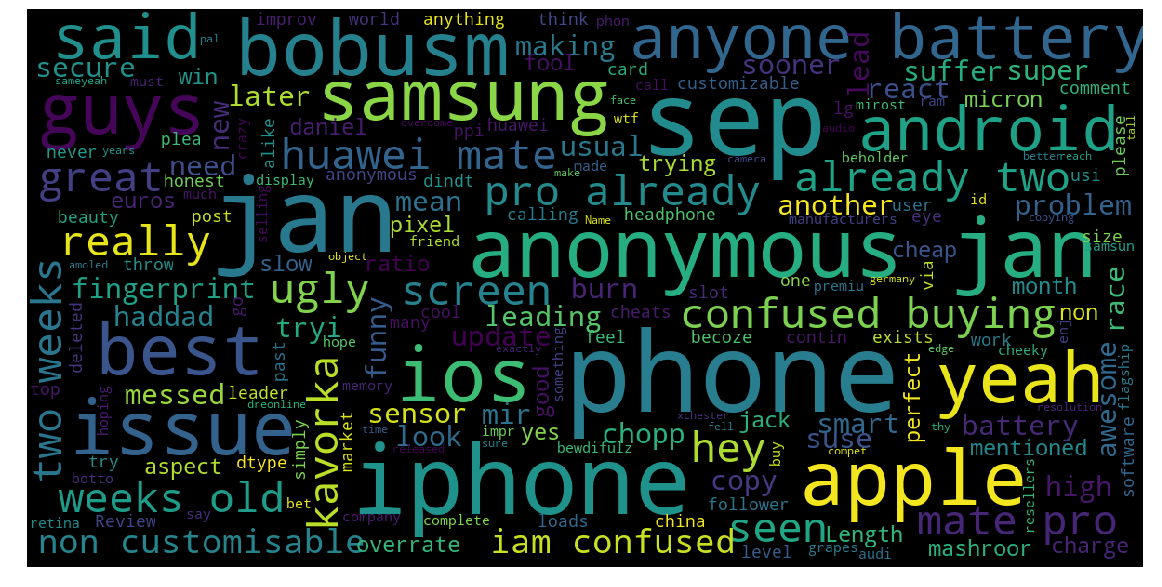

In [45]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, color, title = None):
    wordcloud = WordCloud(
        background_color= color,
        stopwords=stopwords,
        max_words=250,
        max_font_size=40, 
        scale=3,
        random_state=0 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(ipr["Review"],'black')

Once we are done with word cloud visualization, we are going to conduct a sentiment analysis using the TextBlob package.

In [5]:
polarity = []
sub = []
cls = []
blobber = Blobber(analyzer=NaiveBayesAnalyzer())
for sentance in ipr["Review"]:
    #print(sentance)
    #Step 4 Perform Sentiment Analysis on Tweets
    analysis = TextBlob(sentance)
    #print (analysis.sentiment)
    polarity.append(analysis.polarity)
    sub.append(analysis.subjectivity)
    # I am using classifer fuction to classify the reviews
    rst = blobber(sentance)
    end = [sentance, rst.sentiment.classification]
    cls.append(end[1])

ipr["polarity"] = polarity
ipr["subjectivity"] = sub
ipr["Classification"] = cls



In [6]:
ipr.head(30)

,Date,Review,UserName,polarity,subjectivity,Classification
0,16 Jan 2018,mir jan huawei mate pro already two weeks old ...,Mr No,0.216667,0.433333,neg
1,16 Jan 2018,month fell germany via resellers hoping contin...,Anonymous,0.000000,0.000000,pos
2,16 Jan 2018,chopp jan hey guys iam confused buying iphone ...,Anonymous,-0.400000,0.700000,neg
3,16 Jan 2018,chopp jan hey guys iam confused buying iphone ...,Tony,-0.400000,0.700000,neg
4,16 Jan 2018,hey guys iam confused buying iphone x huawei p...,Anonymous,-0.400000,0.700000,neg
5,16 Jan 2018,mir jan huawei mate pro already two weeks old ...,Anonymous,0.477778,0.388889,neg
6,16 Jan 2018,kavorka jan anyone battery issues ios really w...,Jayso,0.200000,0.200000,pos
7,16 Jan 2018,huawei mate pro already two weeks old feel and...,Anonymous,0.344444,0.588889,pos
8,16 Jan 2018,face id,Ken,0.000000,0.000000,pos
9,15 Jan 2018,high resolution audio phone x fingerprint audi...,musthafa,0.160000,0.540000,neg


Now we have the reviews classified based on the polarity and subjectivity. There are comments where both polarity and subjectivity are zero. To get a baised output of both positive and negative reviews, let us clean this data. 

In [7]:
# Drop the rows where the polarity and subjectivity is zero. The review comments are meaningless. 

#creating a copy of unwanted comments. IPR1
IPR1 = ipr[(ipr['polarity'] == 0.000000) & (ipr['subjectivity'] == 0.00000)]

#Now I am droping those comments. We are creating a new review set where the subjectivity is not zero.
#It means that the review has some meaning in it
IPR2 = ipr[(ipr['subjectivity'] != 0.000000)]

In [14]:
#now let us create a variable where the subjectivity has value and polarity is zero. 

IPR3 = IPR2[(IPR2['polarity'] == 0.000000)]



In [22]:
#They have meaningful reviews as their subjectivity score is not zero.

IPR3.head(30)


,Date,Review,UserName,polarity,subjectivity,Classification
85,04 Jan 2018,anonymous jan used note months sold buy iphone...,Apple lover,0.0,0.650000,pos
103,01 Jan 2018,battery capacity uhrmm thanks im heavy user im...,Anonymous,0.0,0.350000,neg
117,29 Dec 2017,big mispriced prediction,CCE,0.0,0.100000,neg
151,22 Dec 2017,xchester sep samsung dindt copy samsung improv...,mono98,0.0,0.125000,neg
171,20 Dec 2017,duel dec known fact graphic designers photogra...,It's somebody,0.0,0.350000,pos
180,19 Dec 2017,apple release flexible phone soon possible,santhosh,0.0,1.000000,neg
193,18 Dec 2017,namitch dec pakistan official apple store duba...,no name,0.0,0.200000,pos
245,13 Dec 2017,gerald dec u say apple would rather allow hous...,Anonymous,0.0,1.000000,neg
255,13 Dec 2017,onslow dec totally agree understand personal p...,Anonymous,0.0,0.525000,pos
306,06 Dec 2017,jhk dec really idea taking ever built computer...,Anonymous,0.0,0.100000,neg


Our analyzer has predicted that the review is either pos of negative in the above dataframe. 
Now we can count the total positive and negative reviews 

In [26]:
IPR2['Classification'].value_counts()

pos    1191
neg     594
Name: Classification, dtype: int64

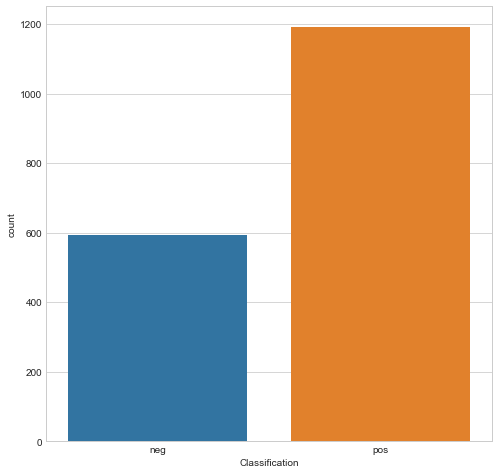

In [35]:
#Let us plot it on a graph

plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
ax = sns.countplot(x="Classification", data=IPR2)

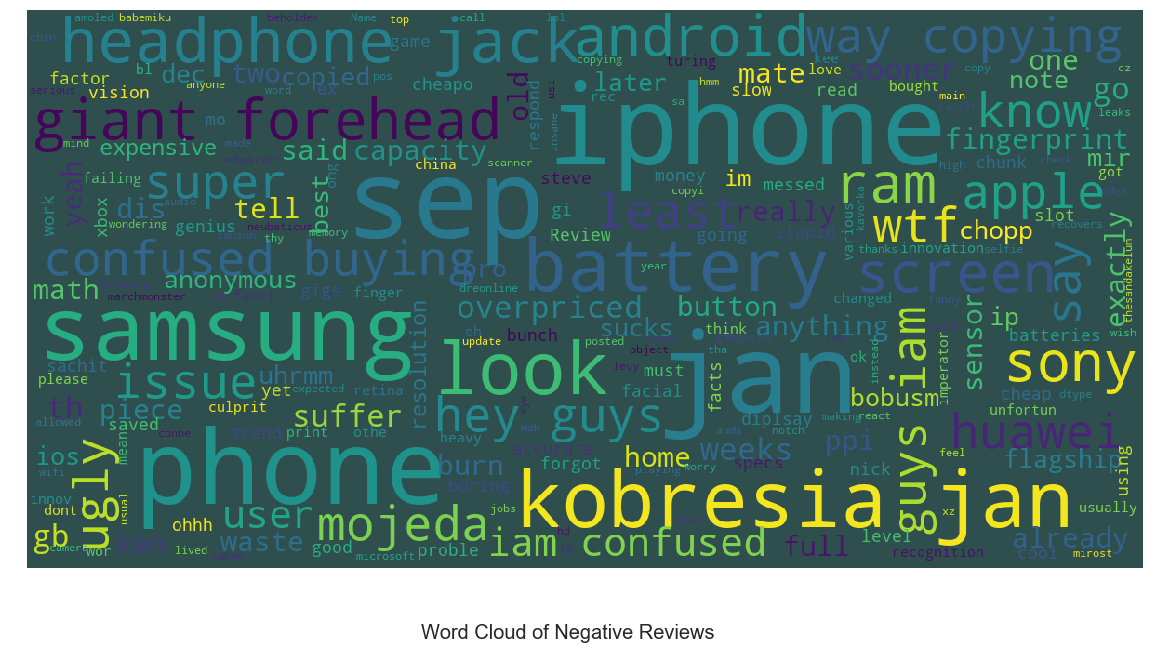

In [59]:
#NOW LET US SEPERATE THE NEGATIVE COMMENTS ALONE

ipr_neg = IPR2[(IPR2['Classification'] == 'neg')]

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

show_wordcloud(ipr_neg["Review"], 'darkslategrey', 'Word Cloud of Negative Reviews')

To gain more insights, we have visualized the word cloud of the negative speakers about the iphone X,

In the picture, we can see that some people are still complaining about the fingerprint battery, screen and headphone jack. Apple has removed their headphone jack way too long from back from iPhone 7. It is suprising that people are still saying that as a downside for new iphone too.

We can clearly see that, may people are not happy about the price point by seeing the words expensive and overprise. People also compare it with the android leading company samsung. It looks like they are happy with other phones in the market than adapting to all new Iphone X. The key take away from this sentiment analysis is that Apple, Inc has to focus on improvising their product using new features. They have taken a big leap of changing the overall mobile market by completely removing features that are loved by their users. No wonder they will stablize on this move. On the other side, people who loved using iphone are extremely excited to use this new innovative iPhone X. They are keen to welcome all new face id, animoji features. 

Apple, Inc can use this project to hear the voice of their customers. They can act on it on their next product release. For any business, customers are the key to success. They have to take care of their unhappy customers. At first, people might talk negatively about a innovation. The company can bring back their magical user exprerience back to the new iPhone X through software updates and by stablizing their new face Id security and animoji feature.